# Exercise 3 - Advanced Statistics for Physics Analysis (A.Y. 2022-2023)
by Erica Brisigotti (2097202)

In [1]:
library(tidyverse)
SAVE = FALSE

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
my_norm <- function(x){ x/( p_delta*sum(x) ) }

In [3]:
estimators <- function(post_func,p,show){
    post_dist <- my_norm(post_func(p))
    p_max <- mean(p[which(post_dist>=max(post_dist)[1])]) # finding most probable value or max value
    cum_dist <- cumsum(post_dist)*p_delta
    low_limit <- p[which(cum_dist >= 0.025)][1]
    up_limit <- p[which(cum_dist >= 0.975)][1]
    # since a symmetric 95% confidence interval corresponds to 1.96x2 sigmas 
    sigma_p <- (up_limit - low_limit)/(1.96*2)
    
    if (show){
        cat("the most likely probability is",p_max,"\n")
        cat("the sigma is",sigma_p,"\n")
        cat("the 95% confidence interval is [",low_limit,",",up_limit,"]","\n")
    }
    return(c(p_max,low_limit,up_limit,sigma_p)) }

## Exercise 1
Study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.
Assuming the following priors, plot the posterior distribution and summerize the results computing the first two moments, compute a 95% credibility interval and give the results in a summary table and draw the limits on the plot of the posterior distribution

In [4]:
n_success = 7
n_trial = 20
n_sample = 300
p_delta <- 1/n_sample
p  <- seq(from=1/(2*n_sample), by=p_delta , length.out=n_sample)
stats <- data.frame( prior=NA, p_max=NA, low_lim=NA, up_lim=NA, sigma_p=NA )

- a uniform distribution

In [5]:
# I define the (uniform) prior 
alpha_prior = 1
beta_prior = 1
p_prior <- my_norm(dbeta(p,alpha_prior,beta_prior))
# I calculate the posterior
p_post <- my_norm(dbeta(p,alpha_prior+n_success,beta_prior+n_trial-n_success))
# I get the estimators
fun <- function(p){dbeta(p,alpha_prior+n_success,beta_prior+n_trial-n_success)}
est <- estimators(fun,p,TRUE)
stats[1,] <- c("uniform",est[1],est[2],est[3],est[4])

the most likely probability is 0.3516667 
the sigma is 0.09863946 
the 95% confidence interval is [ 0.1816667 , 0.5683333 ] 


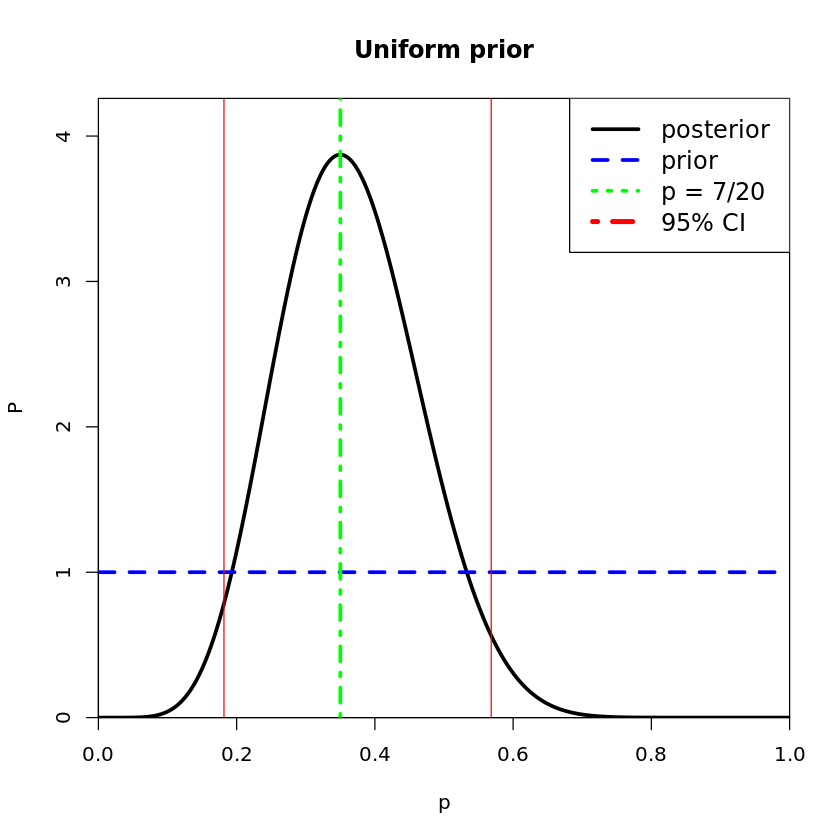

In [6]:
# I plot the result
if (SAVE==TRUE){pdf("assignment3_1.pdf")}
plot(p, p_post , type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(p_post)), 
     xaxs="i", yaxs="i", xlab="p", ylab="P", main = "Uniform prior")
lines(p,p_prior, col='blue',lwd=3,lty=2)
abline(v=n_success/n_trial, col='green',lwd=3,lty=4) 
abline(v=est[2], col='red',lwd=1,lty=1) 
abline(v=est[3], col='red',lwd=1,lty=1) 
legend("topright", legend=c("posterior","prior","p = 7/20","95% CI"),
       col=c("black", "blue","green","red"), lty = c(1, 2, 3, 4, 1),lwd=c(3,3,3,4,1),cex=1.2)
if (SAVE==TRUE){dev.off()}

- a Jeffrey’s prior

In [7]:
# I define the (uniform) prior 
alpha_prior = 1/2
beta_prior = 1/2
p_prior <- my_norm(dbeta(p,alpha_prior,beta_prior))
# I calculate the posterior
p_post <- my_norm(dbeta(p,alpha_prior+n_success,beta_prior+n_trial-n_success))
# I get the estimators
fun <- function(p){dbeta(p,alpha_prior+n_success,beta_prior+n_trial-n_success)}
est <- estimators(fun,p,TRUE)
stats[2,] <- c("Jeffrey's",est[1],est[2],est[3],est[4])

the most likely probability is 0.3416667 
the sigma is 0.1011905 
the 95% confidence interval is [ 0.1716667 , 0.5683333 ] 


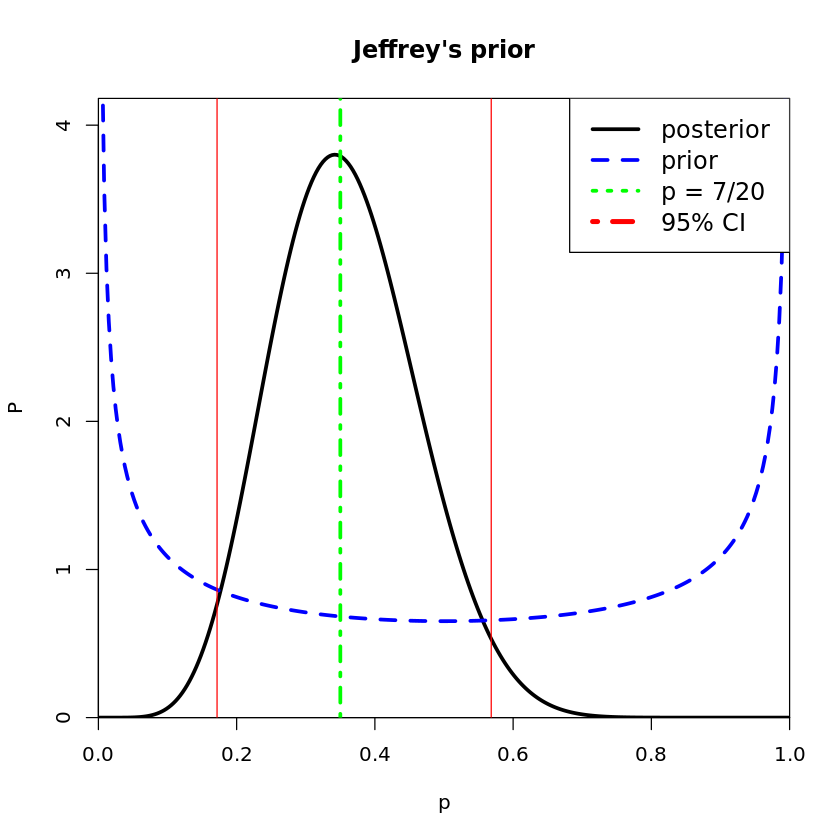

In [8]:
# I plot the results
if (SAVE==TRUE){pdf("assignment3_2.pdf")}
plot(p, p_post , type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(p_post)), 
     xaxs="i", yaxs="i", xlab="p", ylab="P", main = "Jeffrey's prior")
lines(p,p_prior, col='blue',lwd=3,lty=2)
abline(v=n_success/n_trial, col='green',lwd=3,lty=4) 
abline(v=est[2], col='red',lwd=1,lty=1) 
abline(v=est[3], col='red',lwd=1,lty=1) 
legend("topright", legend=c("posterior","prior","p = 7/20","95% CI"),
       col=c("black", "blue","green","red"), lty = c(1, 2, 3, 4, 1),lwd=c(3,3,3,4,1),cex=1.2) 
if (SAVE==TRUE){dev.off()}

- a step function:
$$ g(\pi) =  \begin{cases} \begin{matrix} 
    \pi &  x \leq 0.2  \\ 
    0.2 & 0.2 < x \leq 0.3  \\ 
    0.5 - \pi  &  0.3 < x \leq 0.5 \\ 
    0 & x>0.5
    \end{matrix} \end{cases} $$

In [9]:
my_g <- function(vect){
            t = numeric()
            for (i in 1:length(vect)){ x = vect[i]
                                   if (x <= 0.2){ t[i] <- x }
                                   else if (0.2<x & x<=0.3){ t[i] <- 0.2 }
                                   else if (0.3<x & x<=0.5){ t[i] <- 0.5-x } 
                                   else { t[i] <- 0 } }
            return(t) }

In [10]:
# I define the (uniform) prior 
p_prior <- my_norm(my_g(p))
# I calculate the likelihood (and make sure it's normalized)
p_like <- my_norm(dbinom(x=n_success, size=n_trial, prob=p))
# I calculate the posterior
p_post <- my_norm(p_prior*p_like)
# I get the estimators
fun <- Vectorize(function(p){dbeta(p,1+n_success,1+n_trial-n_success)*my_g(p)})
est <- estimators(fun,p,TRUE)
stats[3,] <- c("step function",est[1],est[2],est[3],est[4])

the most likely probability is 0.3016667 
the sigma is 0.06972789 
the 95% confidence interval is [ 0.175 , 0.4483333 ] 


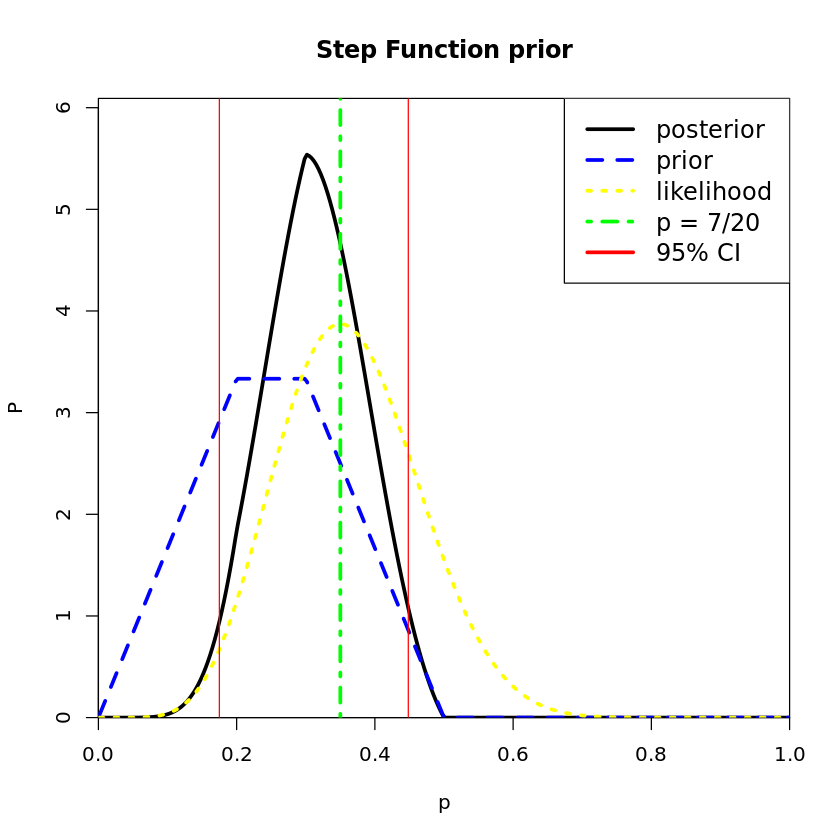

In [11]:
# I plot the result
if (SAVE==TRUE){pdf("assignment3_3.pdf")}
plot(p, p_post , type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(p_post)), 
     xaxs="i", yaxs="i", xlab="p", ylab="P", main = "Step Function prior")
lines(p,p_prior, col='blue',lwd=3,lty=2)
lines(p,p_like, col='yellow',lwd=3,lty=3)
abline(v=n_success/n_trial, col='green',lwd=3,lty=4) 
abline(v=est[2], col='red',lwd=1,lty=1) 
abline(v=est[3], col='red',lwd=1,lty=1) 
legend("topright", legend=c("posterior","prior","likelihood","p = 7/20","95% CI"),
       col=c("black","blue","yellow","green","red"), lty = c(1, 2, 3, 4),lwd=c(3,3,3,3),cex=1.2)
if (SAVE==TRUE){dev.off()}

In [12]:
stats %>% mutate( p_max=as.numeric(p_max), low_lim=as.numeric(low_lim), up_lim=as.numeric(up_lim), sigma_p=as.numeric(sigma_p) ) -> stats
stats

,prior,p_max,low_lim,up_lim,sigma_p
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,uniform,0.3516667,0.1816667,0.5683333,0.09863946
2,Jeffrey's,0.3416667,0.1716667,0.5683333,0.10119048
3,step function,0.3016667,0.1750000,0.4483333,0.06972789


## Exercise 2
Giardia cysts [1] is a parassite that can contaminate food, water, and surfaces, and they can cause giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects.

A group of researchers, working for a Human Health Department, work for determining the quality of stream water. They take n = 116 samples of one-liter water from sites identified to have a heavy environmental impact from birds and waterflow. Out of these samples, y = 17 samples contained Giard cystis. 

In [13]:
# because of the collection of samples, I think of a binomial process and inference
n_trial = 116
n_contaminated = 17
p_delta <- 1/n_sample
p  <- seq(from=1/(2*n_sample), by=p_delta , length.out=n_sample)
stats <- data.frame( prior=NA, p_max=NA, low_lim=NA, up_lim=NA, sigma_p=NA )

Assuming π as the probability that one-liter water sample contains Giardia cystis, find the posterior distribution for π, plot the posterior distribution and summerize the results computing the first two moments, compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table, and add the limits on the plot of the posterior distributions

-  assuming a uniform prior distribution

In [14]:
# I define the (uniform) prior 
alpha_prior = 1
beta_prior = 1
p_prior <- my_norm(dbeta(p,alpha_prior,beta_prior))
# I calculate the posterior
p_post <- my_norm(dbeta(p,alpha_prior+n_contaminated,beta_prior+n_trial-n_contaminated))
# I get the estimators
fun <- function(p){dbeta(p,alpha_prior+n_contaminated,beta_prior+n_trial-n_contaminated)}
est <- estimators(fun,p,TRUE)
stats[1,] <- c("uniform",est[1],est[2],est[3],est[4])

the most likely probability is 0.145 
the sigma is 0.03231293 
the 95% confidence interval is [ 0.095 , 0.2216667 ] 


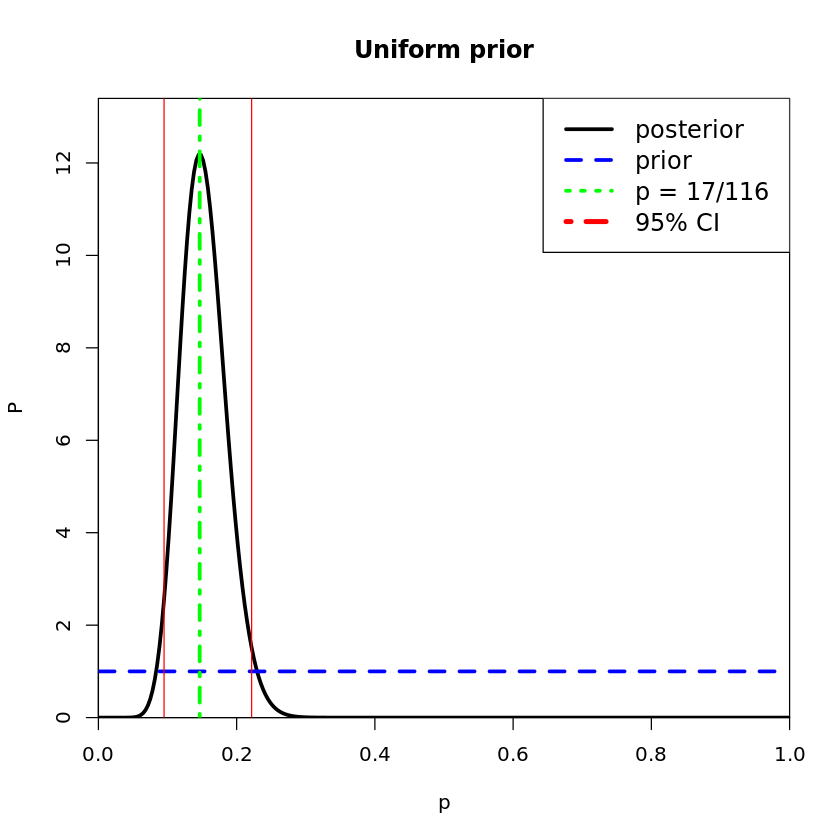

In [15]:
# I plot the result
if (SAVE==TRUE){pdf("assignment3_4.pdf")}
plot(p, p_post , type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(p_post)), 
     xaxs="i", yaxs="i", xlab="p", ylab="P", main = "Uniform prior")
lines(p,p_prior, col='blue',lwd=3,lty=2)
abline(v=n_contaminated/n_trial, col='green',lwd=3,lty=4) 
abline(v=est[2], col='red',lwd=1,lty=1) 
abline(v=est[3], col='red',lwd=1,lty=1) 
legend("topright", legend=c("posterior","prior","p = 17/116","95% CI"),
       col=c("black", "blue","green","red"), lty = c(1, 2, 3, 4, 1),lwd=c(3,3,3,4,1),cex=1.2) 
if (SAVE==TRUE){dev.off()}

- assuming a Beta (1, 4) prior

In [16]:
# I define the (beta) prior 
alpha_prior = 1
beta_prior = 4
p_prior <- my_norm(dbeta(p,alpha_prior,beta_prior))
# I calculate the posterior
p_post <- my_norm(dbeta(p,alpha_prior+n_contaminated,beta_prior+n_trial-n_contaminated))
# I get the estimators
fun <- function(p){dbeta(p,alpha_prior+n_contaminated,beta_prior+n_trial-n_contaminated)}
est <- estimators(fun,p,TRUE)
stats[2,] <- c("Beta(1,4)",est[1],est[2],est[3],est[4])

the most likely probability is 0.1416667 
the sigma is 0.03231293 
the 95% confidence interval is [ 0.09166667 , 0.2183333 ] 


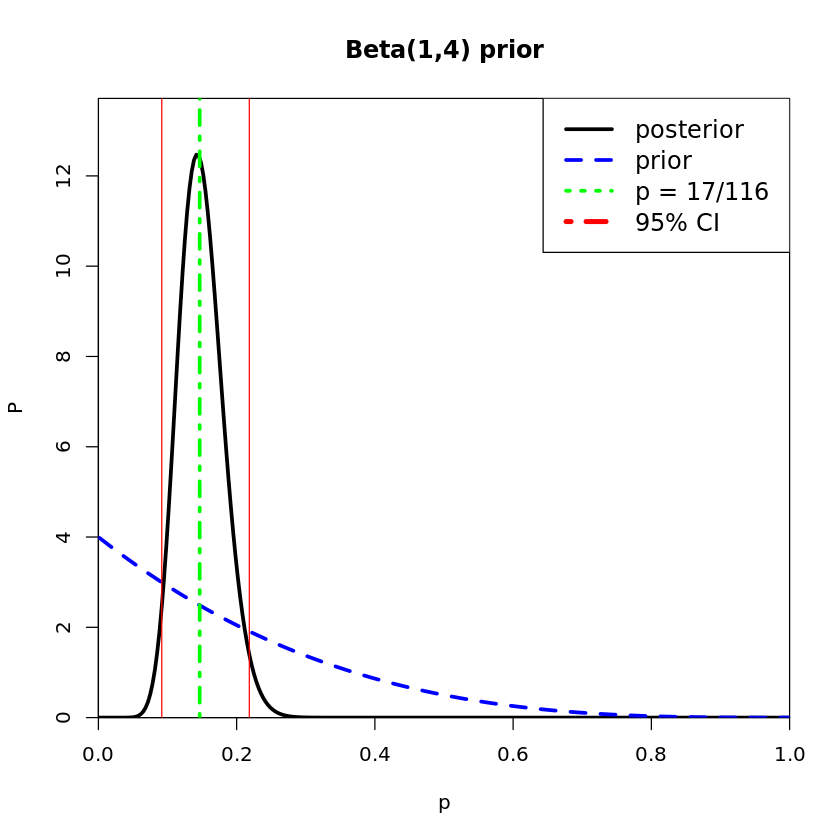

In [17]:
# I plot the result
if (SAVE==TRUE){pdf("assignment3_5.pdf")}
plot(p, p_post , type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(p_post)), 
     xaxs="i", yaxs="i", xlab="p", ylab="P", main = "Beta(1,4) prior")
lines(p,p_prior, col='blue',lwd=3,lty=2)
abline(v=n_contaminated/n_trial, col='green',lwd=3,lty=4) 
abline(v=est[2], col='red',lwd=1,lty=1) 
abline(v=est[3], col='red',lwd=1,lty=1) 
legend("topright", legend=c("posterior","prior","p = 17/116","95% CI"),
       col=c("black", "blue","green","red"), lty = c(1, 2, 3, 4, 1),lwd=c(3,3,3,4,1),cex=1.2) 
if (SAVE==TRUE){dev.off()}

- Find a normal approximation for the posterior $g(π|y)$

In [18]:
# I use the mean and sigma found from the beta prior, to use them as the 
p0 <- (n_contaminated+alpha_prior-1)/(n_trial+alpha_prior+beta_prior-2)
cat("the average of the normal approximation of the beta distribution is ",p0)
s <- ( (n_contaminated+alpha_prior-1)/(n_contaminated+alpha_prior) )**0.5 /(n_trial+alpha_prior+beta_prior-2)
cat("\nthe sigma of the normal approximation of the beta distribution is ",s)
low_l <- p0-1.96*s
up_l <- p0+1.96*s
cat("\nthe 95% confidence interval is [",low_l,",",up_l,"]")
stats[3,] <- c("normal_approximation",p0,low_l,up_l,s)

the average of the normal approximation of the beta distribution is  0.1428571
the sigma of the normal approximation of the beta distribution is  0.008166599
the 95% confidence interval is [ 0.1268506 , 0.1588637 ]

In [19]:
stats %>% mutate( p_max=as.numeric(p_max), low_lim=as.numeric(low_lim), up_lim=as.numeric(up_lim), sigma_p=as.numeric(sigma_p) ) -> stats
stats

,prior,p_max,low_lim,up_lim,sigma_p
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,uniform,0.1450000,0.09500000,0.2216667,0.032312925
2,"Beta(1,4)",0.1416667,0.09166667,0.2183333,0.032312925
3,normal_approximation,0.1428571,0.12685061,0.1588637,0.008166599


## Exercise 3

A coin is flipped n = 30 times with the following outcomes:

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H

In [20]:
library("stringr")
input_data = 'T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H'
input_data = str_replace_all(input_data, "T", "1")
input_data = str_replace_all(input_data, "H", "0")
data = as.numeric(unlist(strsplit(input_data, ",")))
n_tail = sum(data)
n_tot = length(data)

Plot the likelihood, prior and posterior distributions for the data set, evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval,
assuming 

- a flat prior

In [21]:
# I define the (uniform) prior 
alpha_prior = 1
beta_prior = 1
p_prior <- my_norm(dbeta(p,alpha_prior,beta_prior))
# I calculate the likelihood
p_like <- my_norm(dbinom(x=n_tail, size=n_tot, prob=p))
# I calculate the posterior
p_post <- my_norm(dbeta(p,alpha_prior+n_tail,beta_prior+n_tot-n_tail))
# I get the estima
fun <- function(p){dbeta(p,alpha_prior+n_tail,beta_prior+n_tot-n_tail)}
est <- estimators(fun,p,TRUE)
stats[1,] <- c("uniform",est[1],est[2],est[3],est[4])

the most likely probability is 0.5 
the sigma is 0.08588435 
the 95% confidence interval is [ 0.3316667 , 0.6683333 ] 


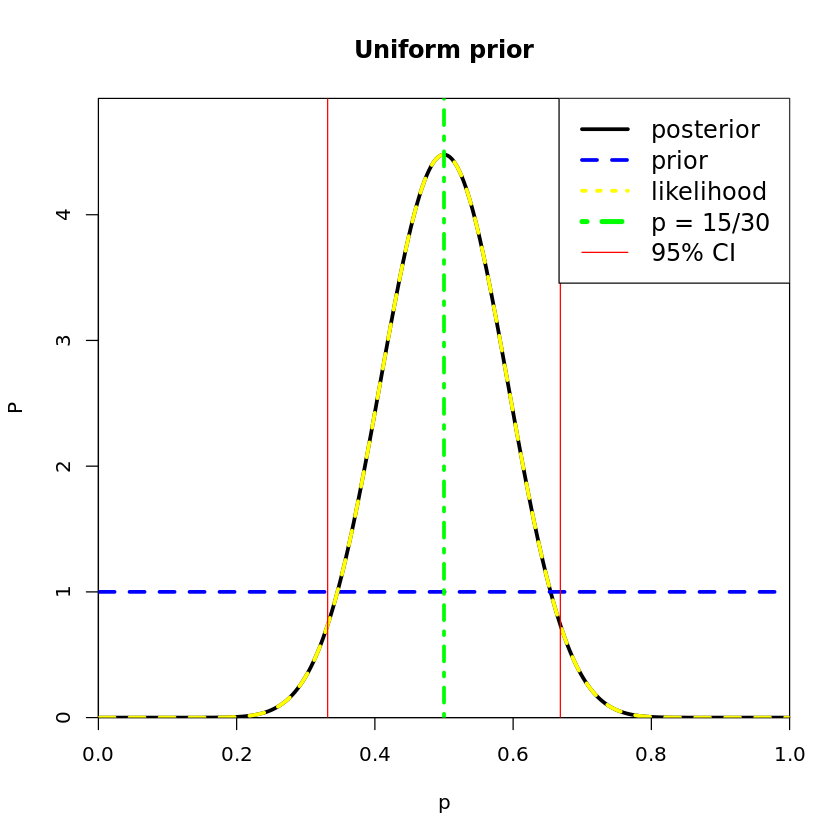

In [22]:
# I plot the result
if (SAVE==TRUE){pdf("assignment3_6.pdf")}
plot(p, p_post , type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(p_post)), 
     xaxs="i", yaxs="i", xlab="p", ylab="P", main = "Uniform prior")
lines(p,p_prior, col='blue',lwd=3,lty=2)
lines(p,p_like, col='yellow',lwd=3,lty=2)
abline(v=n_tail/n_tot, col='green',lwd=3,lty=4) 
abline(v=est[2], col='red',lwd=1,lty=1) 
abline(v=est[3], col='red',lwd=1,lty=1) 
legend("topright", legend=c("posterior","prior","likelihood","p = 15/30","95% CI"),
       col=c("black", "blue","yellow","green","red"), lty = c(1, 2, 3, 4, 1),lwd=c(3,3,3,4,1),cex=1.2)
if (SAVE==TRUE){dev.off()}

- a beta prior

In [23]:
# I define the (beta) prior 
# I set the parameters symmetrically since I have no particular information about which Beta distribution to use
alpha_prior = 5
beta_prior = 5
p_prior <- my_norm(dbeta(p,alpha_prior,beta_prior))
# I calculate the likelihood
p_like <- my_norm(dbinom(x=n_tail, size=n_tot, prob=p))
# I calculate the posterior
p_post <- my_norm(dbeta(p,alpha_prior+n_tail,beta_prior+n_tot-n_tail))
# I get the estimators
fun <- function(p){dbeta(p,alpha_prior+n_tail,beta_prior+n_tot-n_tail)}
est <- estimators(fun,p,TRUE)
stats[2,] <- c("Beta(5,5)",est[1],est[2],est[3],est[4])

the most likely probability is 0.5 
the sigma is 0.07738095 
the 95% confidence interval is [ 0.3483333 , 0.6516667 ] 


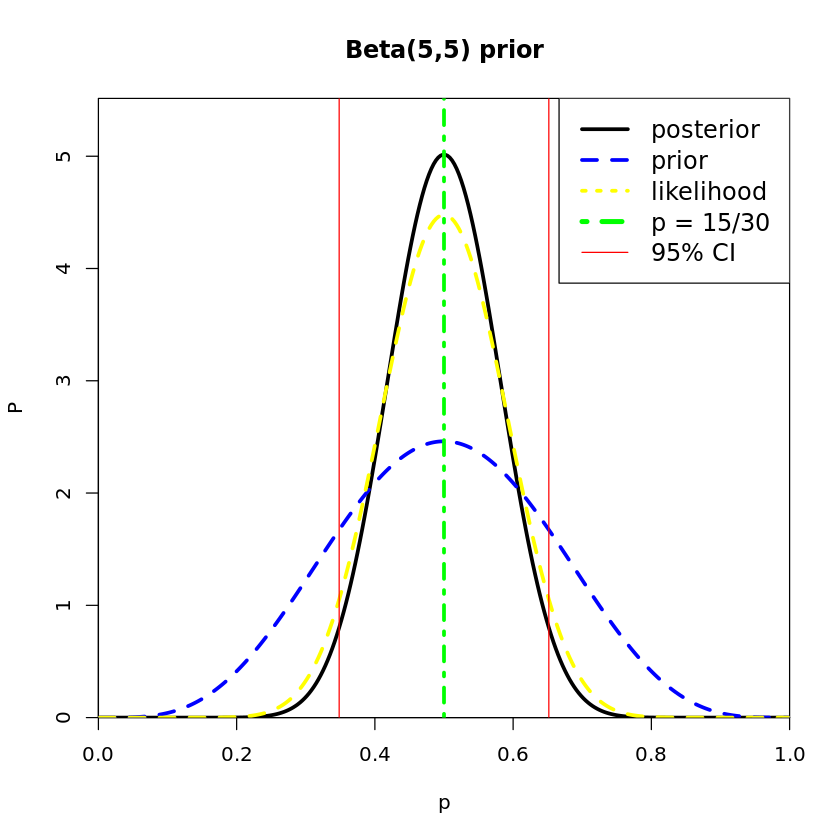

In [24]:
# I plot the result
if (SAVE==TRUE){pdf("assignment3_7.pdf")}
plot(p, p_post , type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(p_post)), 
     xaxs="i", yaxs="i", xlab="p", ylab="P", main = "Beta(5,5) prior")
lines(p,p_prior, col='blue',lwd=3,lty=2)
lines(p,p_like, col='yellow',lwd=3,lty=2)
abline(v=n_tail/n_tot, col='green',lwd=3,lty=4) 
abline(v=est[2], col='red',lwd=1,lty=1) 
abline(v=est[3], col='red',lwd=1,lty=1) 
legend("topright", legend=c("posterior","prior","likelihood","p = 15/30","95% CI"),
       col=c("black", "blue","yellow","green","red"), lty = c(1, 2, 3, 4, 1),lwd=c(3,3,3,4,1),cex=1.2)
if (SAVE==TRUE){dev.off()}

- Repeat the same analysis assuming a sequential analysis of the data [1]. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30)

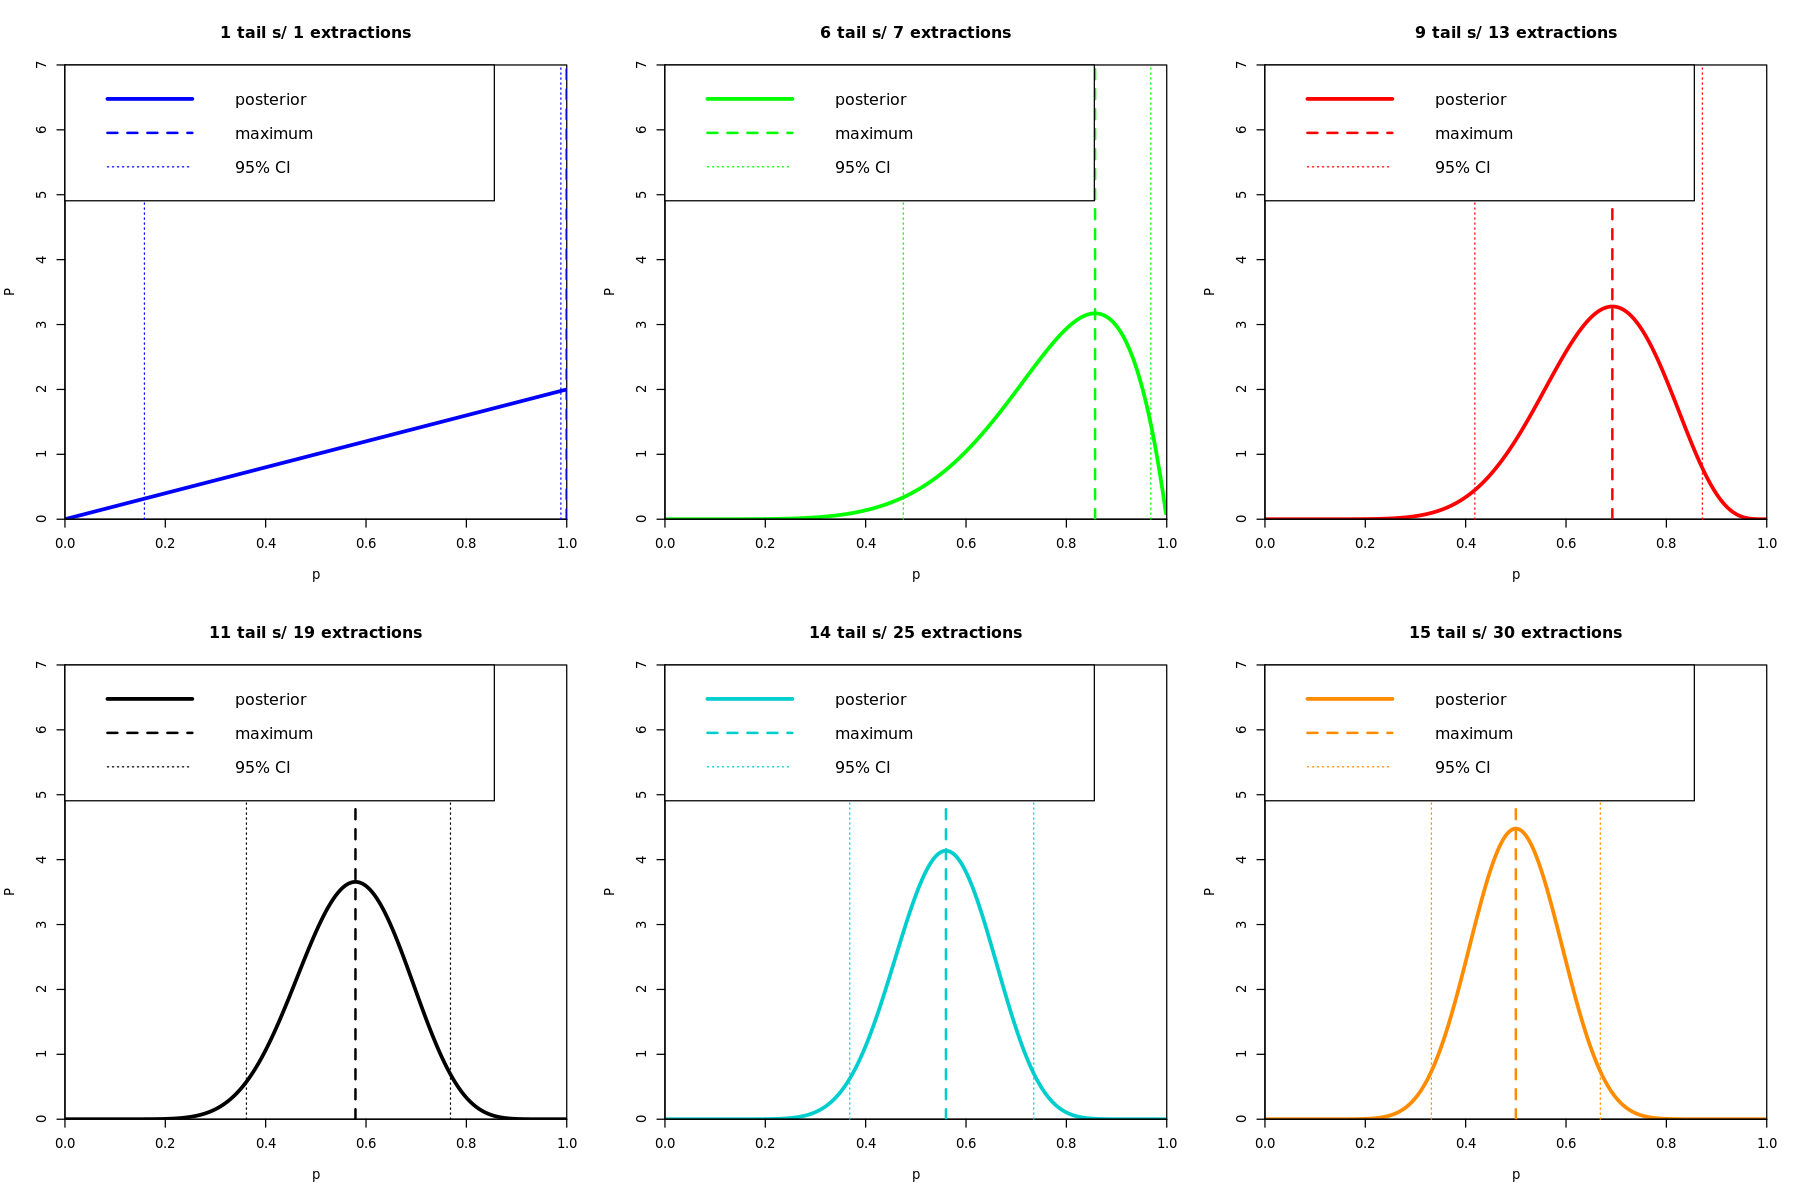

In [25]:
if (SAVE==TRUE){pdf("assignment3_8.pdf")}
options(repr.plot.width=15, repr.plot.height=10)
par ( mfrow=c(2,3) )

points <- c(seq(1,30,6),30)
color <- c('blue','green','red','black','cyan3','darkorange','deeppink','azure4','darkmagenta','aquamarine','burlywood')
n_t <- numeric()
n_total <- numeric()
for (i in 1:length(points)){
    c <- color[i]
    n_t[i]=sum(data[1:points[i]])
    n_total[i]=points[i]
    alpha_prior = 1
    beta_prior = 1
    p_post <- my_norm(dbeta(p,alpha_prior+n_t[i],beta_prior+n_total[i]-n_t[i]))
    fun <- function(p){dbeta(p,alpha_prior+n_t[i],beta_prior+n_total[i]-n_t[i])}
    est <- estimators(fun,p,FALSE)
    plot(p, p_post , type="l", lwd=3, col=c, xlim=c(0,1), ylim=c(0,7), main=paste(n_t[i],"tail s/",n_total[i],"extractions"),
            xaxs="i", yaxs="i", xlab="p", ylab="P")
    abline(v=n_t[i]/n_total[i], col=c,lwd=2,lty=2) 
    abline(v=est[2], col=c,lwd=1,lty=3) 
    abline(v=est[3], col=c,lwd=1,lty=3)
    legend("topleft", legend=c("posterior","maximum","95% CI"),
       col=c(c,c,c), lty = c(1, 2, 3), lwd=c(3,2,1),cex=1.2) }
stats[3,] <- c("uniform sequential",est[1],est[2],est[3],est[4])
if (SAVE==TRUE){dev.off()}

- Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

<span style="color:blue"> As seen in the table below (rows 1 and 3), the sequential and one-step analysis (with uniform prior) give equivalent results in the end. </span>

In [26]:
stats %>% mutate( p_max=as.numeric(p_max), low_lim=as.numeric(low_lim), up_lim=as.numeric(up_lim), sigma_p=as.numeric(sigma_p) ) -> stats
stats

,prior,p_max,low_lim,up_lim,sigma_p
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,uniform,0.5,0.3316667,0.6683333,0.08588435
2,"Beta(5,5)",0.5,0.3483333,0.6516667,0.07738095
3,uniform sequential,0.5,0.3316667,0.6683333,0.08588435


## Exercise 4 - Six Boxes Toy Model: inference
The six boxes toy model is described in reference [2]. Labeling the boxes as follows:

<img title="a title" alt="Alt text" src="boxes.png">

Write a program in R that performs a simulation of the proces

In [27]:
set.seed(89541)
prob0 <- seq(0,5,1)/5

- after selecting a random box

In [28]:
r <- sample(1:6,1)
r

[1] 2

- make random sampling from the box

In [29]:
N <- 100
generated <- rbinom(n=N, size=1,prob = prob0[r])
print(sum(generated)/N)

[1] 0.2


- prins on the standard output the probability of selecting each box

In [30]:
prob0

[1] 0.0 0.2 0.4 0.6 0.8 1.0

- plot the probability for each box as a function of the number of trial

In [31]:
p_out = matrix(, nrow = N, ncol = 6)
p_out[1,] = 1/6
for ( n in 2:N ) {
    for (i in 1:6){ 
        change <- ifelse(generated[n] == 0,(5-(i-1))/5, (i-1)/5)

        p_out[n,i] = p_out[n-1,i]*change }
    p_out[n,] = p_out[n,]/sum(p_out[n,])}

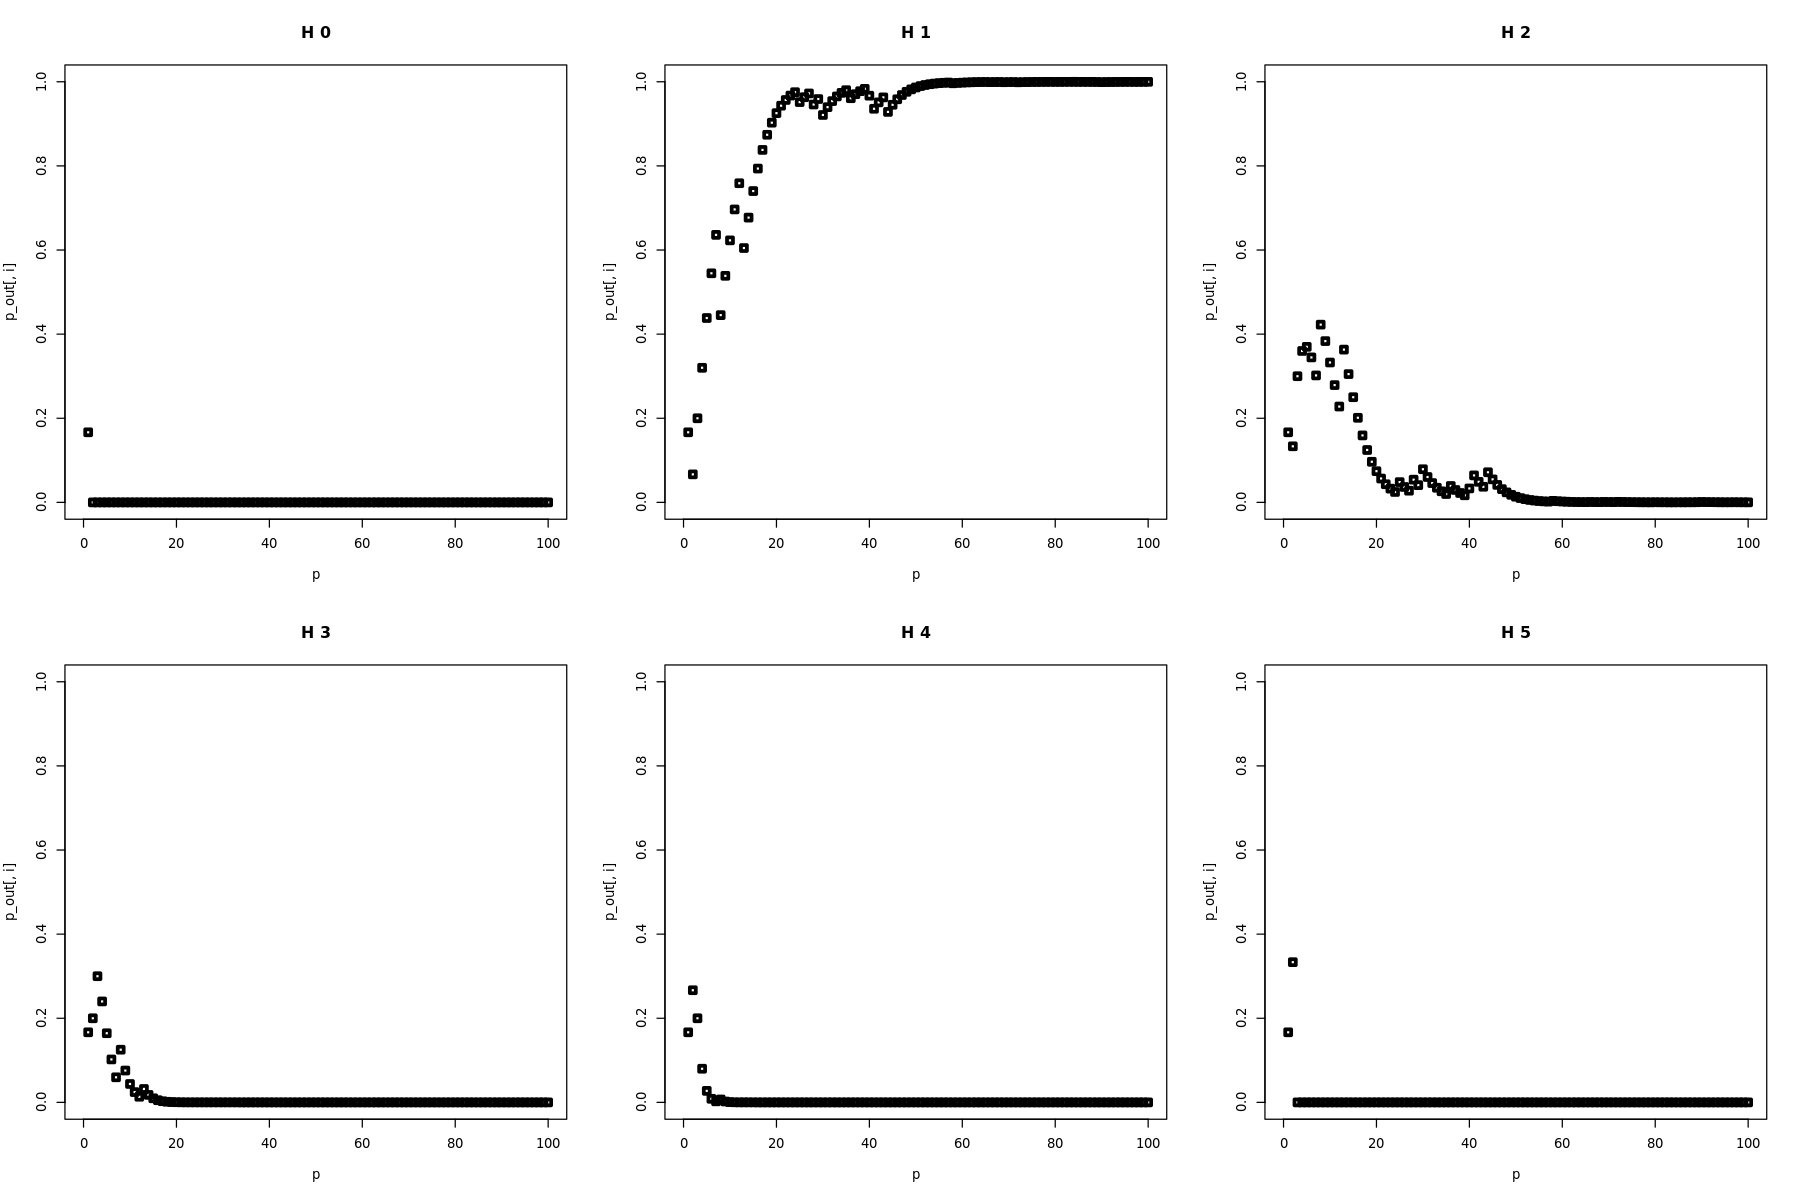

In [32]:
if (SAVE==TRUE){pdf("assignment3_9.pdf")}
options(repr.plot.width=15, repr.plot.height=10)
par ( mfrow=c(2,3) )
for (i in 1:6){
    title <- paste("H",(i-1))
    plot(1:N, p_out[,i], pch=0, lwd=3, col='black',
        xlim=c(0,N),
        ylim=c(0,1) ,
        xlab='p',
        main= title ) }
if (SAVE==TRUE){dev.off()}

##  References
[1] https://www.cdc.gov/dpdx/giardiasis/index.html

[2] G. D’Agostini, Probability, propensity and probabilities of propensities (and of probabilities), https://
arxiv.org/pdf/1612.05292.pdf , G. D’Agostini, More lessons form the six box toy experiment, https://arxiv.org/pdf/1701.01143.pd